In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing7_noPER/evaluations/lsm.csv')
# 3072, 4096, 5120, 6144, 7168, 8192, 9216, 10240, 11264, 12288, 13312, 14336, 15360, 16384
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing31/evaluations/rl_episode_7168.csv')
# Create a new column in the rl DataFrame which sums per path up to each and including each time step the q_t
lsm['Q_t'] = lsm.groupby('path')['q_t'].cumsum()
rl['Q_t'] = rl.groupby('path')['q_t'].cumsum()

lsm['payoff'] = np.maximum(lsm['spot'] - 1, 0) * lsm['q_t']
rl['payoff'] = np.maximum(rl['spot'] - 1, 0) * rl['q_t']

lsm.sort_values(by=['path', 'time_step'], inplace=True)
rl.sort_values(by=['path', 'time_step'], inplace=True)

rl.query('path == 0')

rl

,path,time_step,Payoff,q_exercised_norm,q_remaining_norm,time_to_maturity_norm,normalized_time,spot,X_t,Y_t,days_since_exercise_norm,q_t,reward,Q_t,payoff
0,0,0,0.000000,0.000000,1.000000,1.047619,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0,1,0.006442,0.000000,1.000000,1.000000,0.045455,1.006442,0.006421,0.000000,0.045455,0.0,0.0,0.000000,0.0
2,0,2,0.005673,0.000000,1.000000,0.952381,0.090909,1.005673,0.005657,0.000000,0.090909,0.0,0.0,0.000000,0.0
3,0,3,0.462635,0.000000,1.000000,0.904762,0.136364,1.462635,-0.013245,0.393484,0.136364,0.0,0.0,0.000000,0.0
4,0,4,0.106934,0.000000,1.000000,0.857143,0.181818,1.106934,-0.115437,0.217031,0.181818,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85260,4095,17,-0.210374,0.099136,0.900864,0.238095,0.772727,0.789626,-0.236195,0.000000,0.045455,0.0,-0.0,1.982727,0.0
85261,4095,18,-0.164334,0.099136,0.900864,0.190476,0.818182,0.835666,-0.179526,0.000000,0.090909,0.0,-0.0,1.982727,0.0
85262,4095,19,-0.166519,0.099136,0.900864,0.142857,0.863636,0.833481,-0.182145,0.000000,0.136364,0.0,-0.0,1.982727,0.0
85263,4095,20,0.174465,0.099136,0.900864,0.095238,0.909091,1.174465,-0.152463,0.313276,0.181818,0.0,0.0,1.982727,0.0


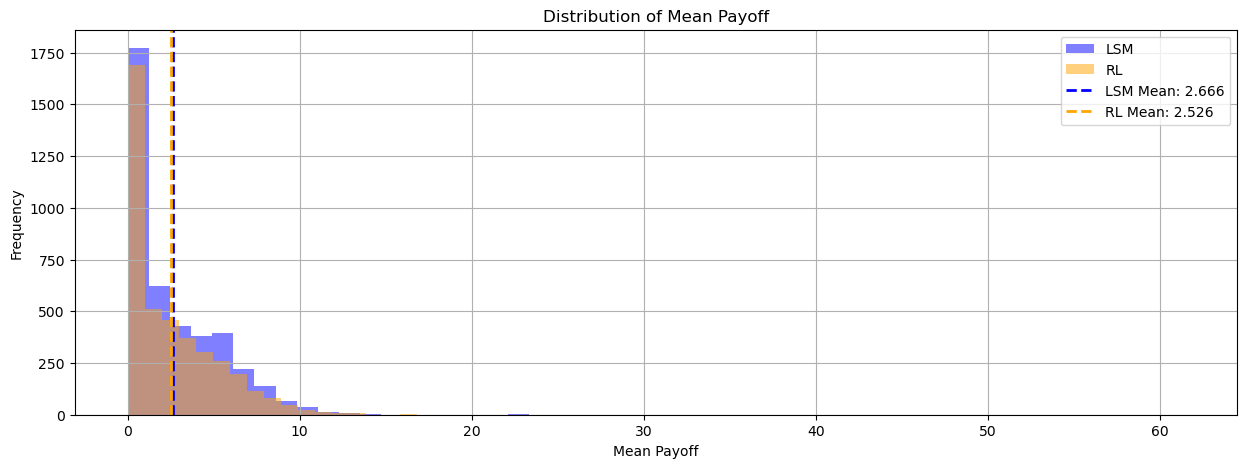

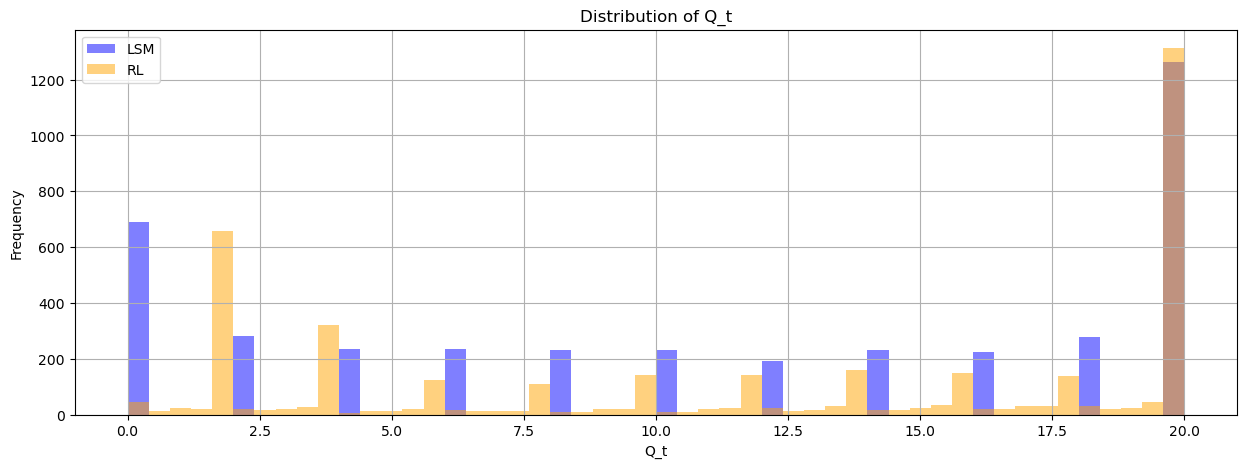

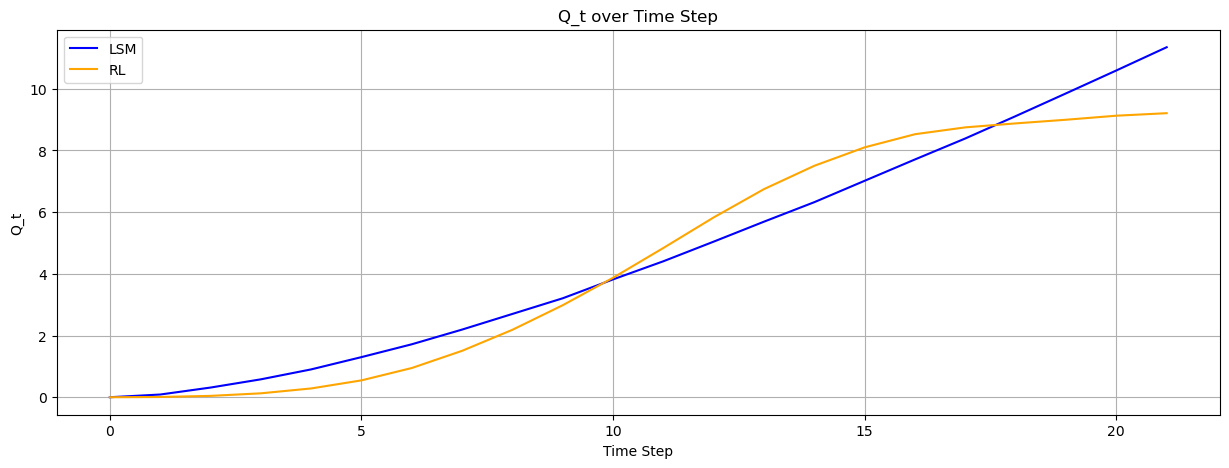

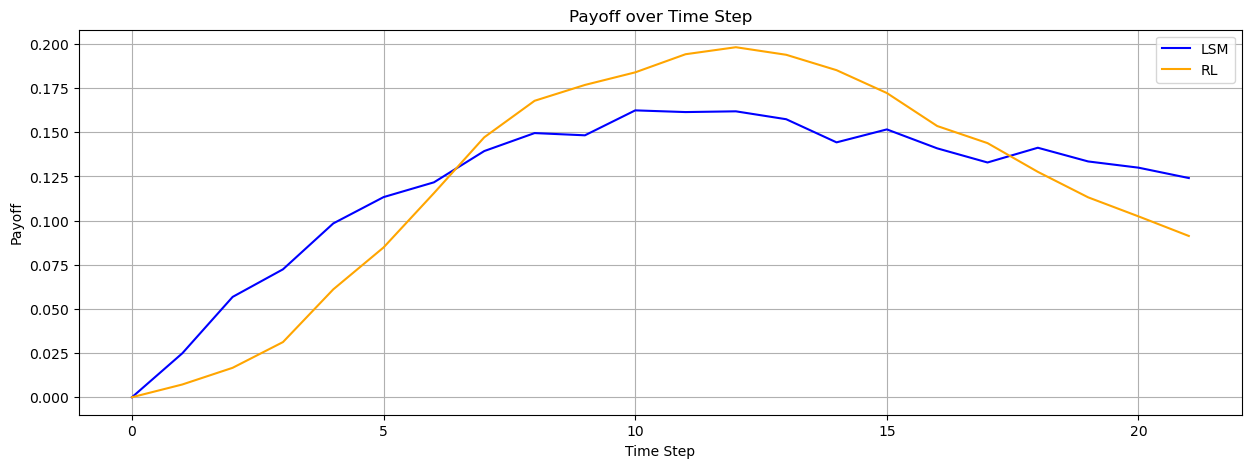

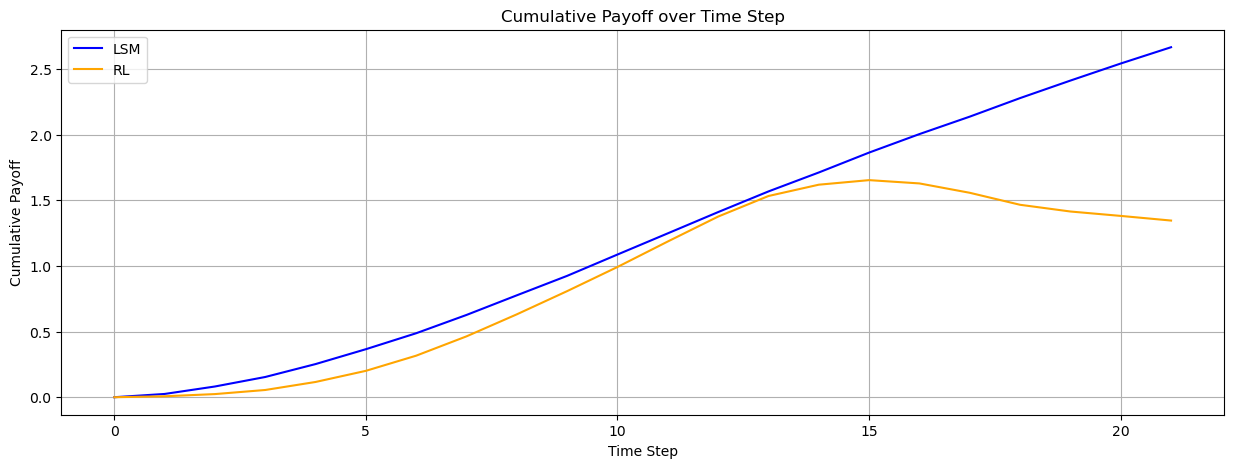

In [6]:
grouped_lsm = lsm.groupby('path').agg({'Q_t': 'max', 'time_step': 'max', 'payoff': 'sum'}).reset_index()
grouped_rl = rl.groupby('path').agg({'Q_t': 'max', 'time_step': 'max', 'payoff': 'sum'}).reset_index()

# Plot distribution of mean payoff for both lsm and rl
plt.figure(figsize=(15, 5))
plt.hist(grouped_lsm['payoff'], bins=50, alpha=0.5, label='LSM', color='blue')  
plt.hist(grouped_rl['payoff'], bins=50, alpha=0.5, label='RL', color='orange')

# Calculate means - and add them as vertical lines
mean_lsm = grouped_lsm['payoff'].mean()
mean_rl = grouped_rl['payoff'].mean()
plt.axvline(mean_lsm, color='blue', linestyle='dashed', linewidth=2, label=f'LSM Mean: {mean_lsm:.3f}')
plt.axvline(mean_rl, color='orange', linestyle='dashed', linewidth=2, label=f'RL Mean: {mean_rl:.3f}')

plt.title('Distribution of Mean Payoff')
plt.xlabel('Mean Payoff')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# plot distribution of Q_t for both lsm and rl
plt.figure(figsize=(15, 5))
plt.hist(grouped_lsm['Q_t'], bins=50, alpha=0.5, label='LSM', color='blue')
plt.hist(grouped_rl['Q_t'], bins=50, alpha=0.5, label='RL', color='orange')
plt.title('Distribution of Q_t')
plt.xlabel('Q_t')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

lsm['Payoff_t'] = lsm.groupby('path')['payoff'].cumsum()
rl['Payoff_t'] = rl.groupby('path')['payoff'].cumsum()
grouped_lsm_t = lsm.groupby('time_step').agg({'Q_t': 'mean','payoff': 'mean', 'Payoff_t': 'mean'}).reset_index()
grouped_rl_t = rl.groupby('time_step').agg({'Q_t': 'mean','payoff': 'mean', 'Payoff_t': 'mean'}).reset_index()

# plot Q_t over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['Q_t'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['Q_t'], label='RL', color='orange')
plt.title('Q_t over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Q_t')
plt.legend()
plt.grid(True)
plt.show()

# plot payoff over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['payoff'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['payoff'], label='RL', color='orange')
plt.title('Payoff over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()

# plot cumulative payoff over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['Payoff_t'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['Payoff_t'], label='RL', color='orange')
plt.title('Cumulative Payoff over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Payoff')
plt.legend()
plt.grid(True)
plt.show()

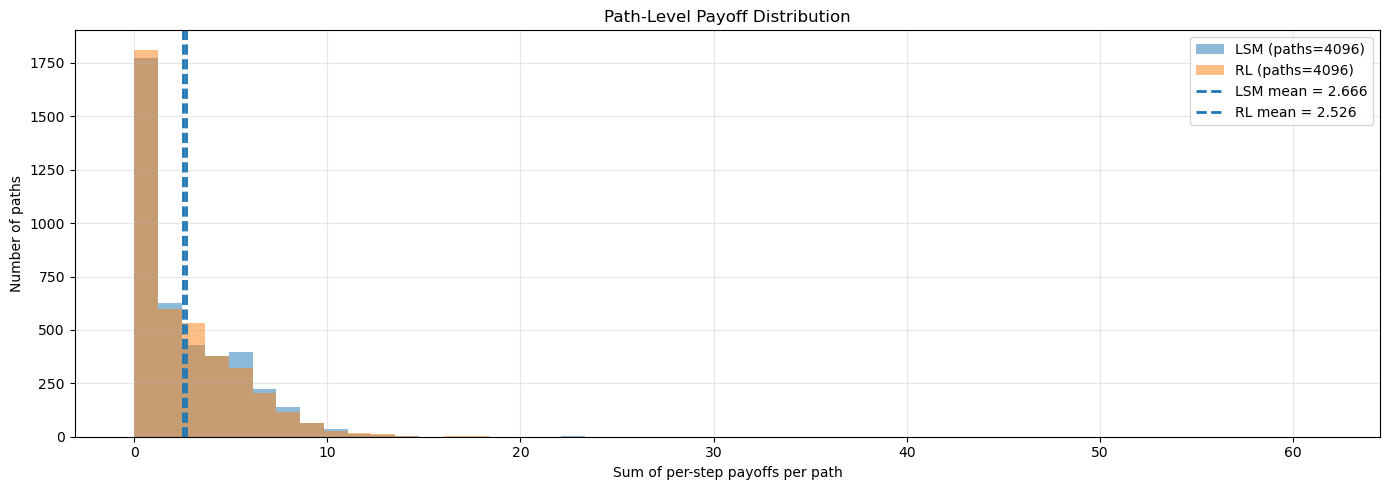

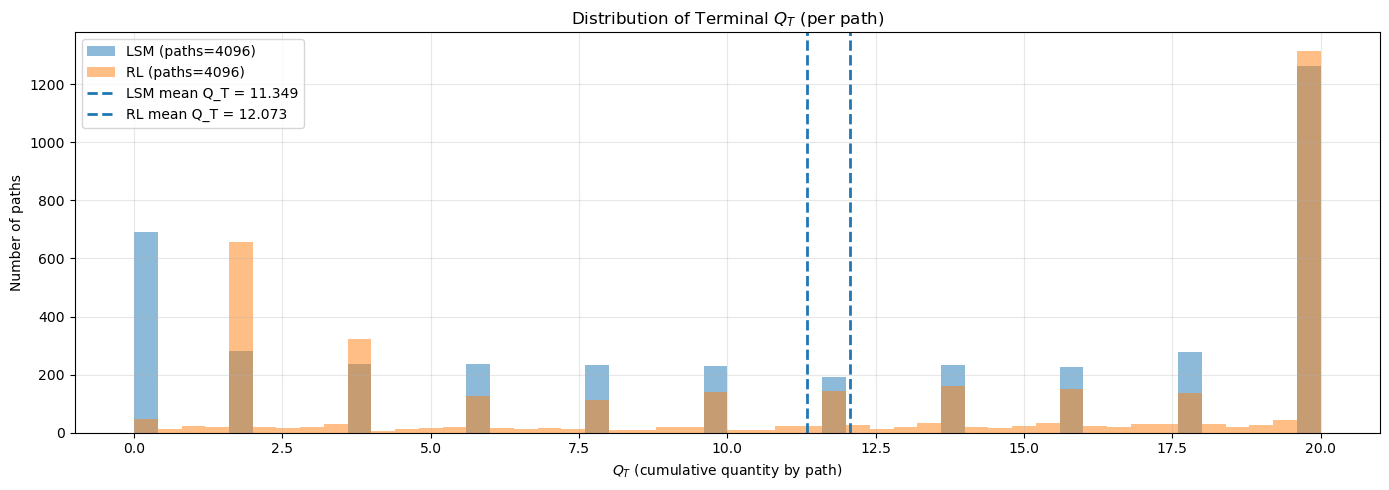

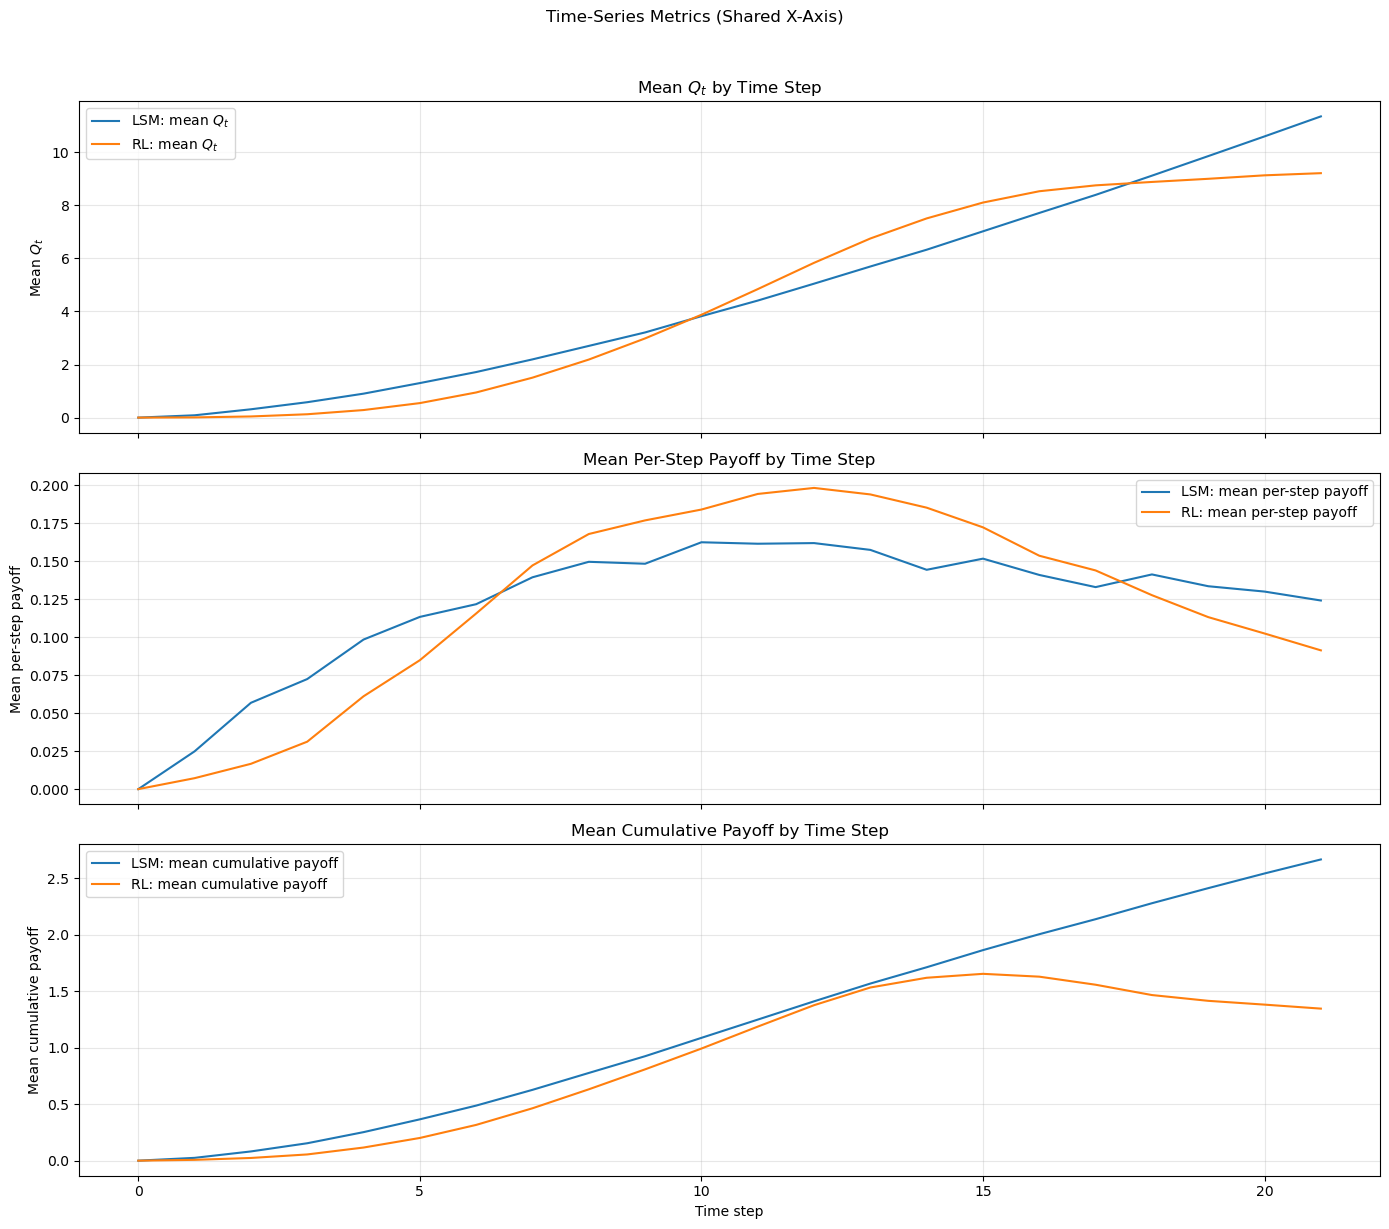

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Load & prep
# ----------------------------
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing7_noPER/evaluations/lsm.csv')
rl  = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing31/evaluations/rl_episode_7168.csv')

# Running sums by path
lsm['Q_t'] = lsm.groupby('path')['q_t'].cumsum()
rl['Q_t']  = rl.groupby('path')['q_t'].cumsum()

# Per-step payoff (kept your original definition: uses instantaneous q_t)
lsm['payoff'] = np.maximum(lsm['spot'] - 1, 0) * lsm['q_t']
rl['payoff']  = np.maximum(rl['spot'] - 1, 0) * rl['q_t']

lsm.sort_values(['path', 'time_step'], inplace=True)
rl.sort_values(['path', 'time_step'], inplace=True)

# Aggregate to path level (clearer column names)
grouped_lsm = (
    lsm.groupby('path')
       .agg(Q_T=('Q_t','max'), last_time_step=('time_step','max'), path_payoff=('payoff','sum'))
       .reset_index()
)
grouped_rl = (
    rl.groupby('path')
      .agg(Q_T=('Q_t','max'), last_time_step=('time_step','max'), path_payoff=('payoff','sum'))
      .reset_index()
)

# Time-step means across paths
lsm['Payoff_t'] = lsm.groupby('path')['payoff'].cumsum()
rl['Payoff_t']  = rl.groupby('path')['payoff'].cumsum()

grouped_lsm_t = (
    lsm.groupby('time_step')
       .agg(mean_Q_t=('Q_t','mean'), mean_payoff=('payoff','mean'), mean_cum_payoff=('Payoff_t','mean'))
       .reset_index()
)
grouped_rl_t = (
    rl.groupby('time_step')
      .agg(mean_Q_t=('Q_t','mean'), mean_payoff=('payoff','mean'), mean_cum_payoff=('Payoff_t','mean'))
      .reset_index()
)

# Common x-range for all time-series plots (acts like sharex)
xmin = int(min(grouped_lsm_t['time_step'].min(), grouped_rl_t['time_step'].min()))
xmax = int(max(grouped_lsm_t['time_step'].max(), grouped_rl_t['time_step'].max()))

# ----------------------------
# 1) Distribution: path-level payoff
# ----------------------------
bins_payoff = np.histogram_bin_edges(
    np.concatenate([grouped_lsm['path_payoff'].values, grouped_rl['path_payoff'].values]),
    bins=50
)

plt.figure(figsize=(14, 5))
plt.hist(grouped_lsm['path_payoff'], bins=bins_payoff, alpha=0.5, label=f'LSM (paths={len(grouped_lsm)})', density=False)
plt.hist(grouped_rl['path_payoff'],  bins=bins_payoff, alpha=0.5, label=f'RL (paths={len(grouped_rl)})',  density=False)

mean_lsm = grouped_lsm['path_payoff'].mean()
mean_rl  = grouped_rl['path_payoff'].mean()
plt.axvline(mean_lsm, linestyle='--', linewidth=2, label=f'LSM mean = {mean_lsm:.3f}')
plt.axvline(mean_rl,  linestyle='--', linewidth=2, label=f'RL mean = {mean_rl:.3f}')

plt.title('Path-Level Payoff Distribution')
plt.xlabel('Sum of per-step payoffs per path')
plt.ylabel('Number of paths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------------------
# 2) Distribution: terminal Q_T (per path)
# ----------------------------
bins_q = np.histogram_bin_edges(
    np.concatenate([grouped_lsm['Q_T'].values, grouped_rl['Q_T'].values]),
    bins=50
)

plt.figure(figsize=(14, 5))
plt.hist(grouped_lsm['Q_T'], bins=bins_q, alpha=0.5, label=f'LSM (paths={len(grouped_lsm)})')
plt.hist(grouped_rl['Q_T'],  bins=bins_q, alpha=0.5, label=f'RL (paths={len(grouped_rl)})')

mean_lsm_q = grouped_lsm['Q_T'].mean()
mean_rl_q  = grouped_rl['Q_T'].mean()
plt.axvline(mean_lsm_q, linestyle='--', linewidth=2, label=f'LSM mean Q_T = {mean_lsm_q:.3f}')
plt.axvline(mean_rl_q,  linestyle='--', linewidth=2, label=f'RL mean Q_T = {mean_rl_q:.3f}')

plt.title('Distribution of Terminal $Q_T$ (per path)')
plt.xlabel(r'$Q_T$ (cumulative quantity by path)')
plt.ylabel('Number of paths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(14, 12))
axs[0].plot(grouped_lsm_t['time_step'], grouped_lsm_t['mean_Q_t'], label='LSM: mean $Q_t$')
axs[0].plot(grouped_rl_t['time_step'],  grouped_rl_t['mean_Q_t'],  label='RL: mean $Q_t$')
axs[0].set_title('Mean $Q_t$ by Time Step'); axs[0].set_ylabel('Mean $Q_t$'); axs[0].legend(); axs[0].grid(True, alpha=0.3)

axs[1].plot(grouped_lsm_t['time_step'], grouped_lsm_t['mean_payoff'], label='LSM: mean per-step payoff')
axs[1].plot(grouped_rl_t['time_step'],  grouped_rl_t['mean_payoff'],  label='RL: mean per-step payoff')
axs[1].set_title('Mean Per-Step Payoff by Time Step'); axs[1].set_ylabel('Mean per-step payoff'); axs[1].legend(); axs[1].grid(True, alpha=0.3)

axs[2].plot(grouped_lsm_t['time_step'], grouped_lsm_t['mean_cum_payoff'], label='LSM: mean cumulative payoff')
axs[2].plot(grouped_rl_t['time_step'],  grouped_rl_t['mean_cum_payoff'],  label='RL: mean cumulative payoff')
axs[2].set_title('Mean Cumulative Payoff by Time Step'); axs[2].set_xlabel('Time step'); axs[2].set_ylabel('Mean cumulative payoff')
axs[2].legend(); axs[2].grid(True, alpha=0.3)

fig.suptitle('Time-Series Metrics (Shared X-Axis)', y=1.02, fontsize=12)
fig.tight_layout()
plt.show()
# -------------------------------------------------------------------
